In [1]:
""" Import of modules """
import numpy.random as np
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from tqdm import tqdm_notebook as tqdm
sns.set()

""" Initialization """
Npop = 10000 #Population size
threshold = 5 #Mutation threshold for cancer
parr = numpy.exp(numpy.arange(-24, -14)) #Mutation rate
narr = numpy.exp(numpy.arange(14, 25)) #Cell number

ndiv = 365 #Number of cell divisions per year
age = 100 #Lifespan
time = ndiv*age #Duration of the simulation

threshold = 5 #Mutation threshold for cancer
n = narr[5] #Carrying capacity
# p = parr[5] #Mutation rate

persistence = numpy.zeros(Npop*(threshold-1)).reshape(Npop, (threshold-1))
crc, cmc, crr = numpy.zeros(len(parr)*age).reshape(len(parr),age), numpy.zeros(len(parr)*age).reshape(len(parr),age), numpy.zeros(len(parr)*age).reshape(len(parr),age)
pmean, pstd = numpy.zeros(len(parr)*(threshold-1)).reshape(len(parr), threshold-1), numpy.zeros(len(parr)*(threshold-1)).reshape(len(parr), threshold-1)

nzeros = numpy.zeros
RAND = np.random_sample
# dataframe = pd.DataFrame

wts=numpy.array([0.013818048555027355, 0.0553159434123515, 0.07253241028642805, 0.07303103455912367, 0.07216711636515384, 0.06647847243710951, 0.06452984736662379, 0.07104508339877749, 0.08076197744193335, 0.08185169462960405, 0.07211714069611326, 0.06271758577923968, 0.048454493422914295, 0.038794489715138394, 0.034263609991378986, 0.03177168658747205, 0.026997999757072733, 0.017842803104216928, 0.01550856249432107]) #Weights from the US 2000 standard population
n_class = len(wts)

flag = 0
for p in tqdm(parr, desc='Mutation rate', leave=False):
    cancer_count = nzeros(age) #Age-wise incidence of cancer
    num_surv = nzeros(age) #Number of survivors in each age/generation
    cancer_fract = nzeros(age) #Normalized incidence of cancer
    cumul_count = nzeros(age) #Cumulative count of cancer
    crude_rate = nzeros(age) #Calculated age-wise incidence per 100000

    gdist = np.normal(0, 3, Npop)

    for j in tqdm(range(Npop), desc='Npop', leave=False):
        t=0 #Index to track time
        n_mut = nzeros(time, dtype=int) #Number of mutations
        m = nzeros((threshold+1)*time).reshape((threshold+1), time)
        m[0, 0] = 1
        p_mut=1-((1-p)**m[0, 0]) #Initial probabiltiy of first mutation arising in the population

        g = numpy.linspace(0.007, 0.007*gdist[j], num=threshold+1) #Growth rate progression
        d = g[0]/5 #Constant death rate

        for t in range(1, time):

            n_mut[t] = n_mut[t-1]
            m[:, t] = m[:, t-1]
            p_mut = 1-(1-p)**m[n_mut[t], t]

            if p_mut > RAND(): #New mutant population
                n_mut[t] += 1
                m[n_mut[t], t] = 1.0
                p_mut = 1-((1-p)**m[n_mut[t], t])
                m[n_mut[t]-1, t] -= 1.0

            elif n_mut[t] < threshold: #Growth of existing mutant or normal population, as the case may be
                m[:, t] += ((m[:, t]*g*(n-m[:, t].sum())/n) - m[:, t]*d)
                p_mut = 1-(1-p)**m[n_mut[t], t]

            if n_mut[t] == threshold:
                cancer_count[int(t/ndiv)] += 1
                persistence[j] = numpy.array([len(n_mut[n_mut==a]) for a in range(1,threshold)])
                break

    """ Calculations """
    cumul_count = cancer_count.cumsum()

    num_surv = numpy.array([Npop]*age, dtype=float)
    num_surv[1:] -= cumul_count[:-1]

    index = num_surv>0
    cancer_fract[index] = cancer_count[index]/(cancer_count[index]+num_surv[index])
    crude_rate = cancer_fract*100000

    crc[flag] = cancer_count[:]
    cmc[flag] = cumul_count[:]
    crr[flag] = crude_rate[:]
    pmean[flag] = persistence.mean(axis=0)[:]
    pstd[flag] = persistence.std(axis=0)[:]
    flag += 1

KeyboardInterrupt: 

In [8]:
# mdata.to_excel('/home/iiser/PhD/Research/cancer_project/cancer_incidence_model/linear_model/V1/data/22Aug2018/linear_v1_m_g.xlsx')

df_crc = pd.DataFrame(crc, index = parr)
df_crc.index.names = ['Mutation rate']
df_crc.columns.names = ['Age']
df_crc.to_excel('/home/iiser/PhD/github-cancer-incidence-models/all-data/v2-data/22Oct2018/linear-v2-multipop-cancer-count-p.xlsx')

df_cc = pd.DataFrame(cmc, index = parr)
df_cc.index.names = ['Mutation rate']
df_cc.columns.names = ['Age']
df_cc.to_excel('/home/iiser/PhD/github-cancer-incidence-models/all-data/v2-data/22Oct2018/linear-v2-multipop-cumulative-count-p.xlsx')

df_crr = pd.DataFrame(cmc, index = parr)
df_crr.index.names = ['Mutation rate']
df_crr.columns.names = ['Age']
df_crr.to_excel('/home/iiser/PhD/github-cancer-incidence-models/all-data/v2-data/22Oct2018/linear-v2-multipop-crude-rate-p.xlsx')

# df_aar = pd.DataFrame(aa_rate, index=garr)
# df_aar.index.names = ['Cell number']
# df_aar.columns.names = [r'$Age-adjusted\ rate$']
# df_aar.to_excel('/home/iiser/PhD/Research/cancer_project/cancer_incidence_model/linear_model/V1/data/22Aug2018/linear_v1_aa_rate_neff.xlsx')

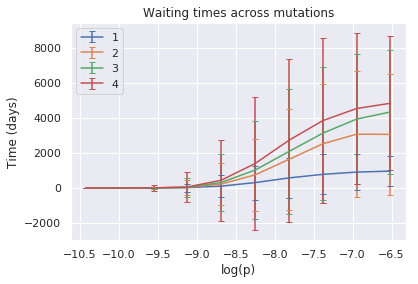

In [16]:
for pmu, ps, l in zip(pmean.T, pstd.T, numpy.arange(1, 5)):
    p = plt.errorbar(numpy.log10(parr), pmu, yerr=ps, label=l, capsize=3)
plt.ylabel('Time (days)')
plt.xlabel('log(p)')
plt.title('Waiting times across mutations')
plt.legend(loc='best')
plt.savefig('/home/iiser/PhD/github-cancer-incidence-models/all-figures/v2-figures/22Oct2018/linear-v2-multipop-waiting-time-p.svg')

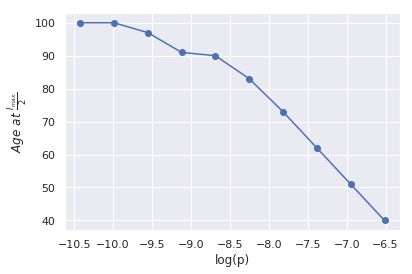

In [10]:
half_age_parr = numpy.zeros_like(parr)
for i in range(len(parr)):
    half_age_parr[i] = numpy.less_equal(cmc[i], cmc[i,-1]/2).sum()
plt.plot(numpy.log10(parr), half_age_parr, 'o-')
plt.xlabel('log(p)')
plt.ylabel(r'$Age\ at\ \frac{I_{max}}{2}$')
plt.savefig('/home/iiser/PhD/github-cancer-incidence-models/all-figures/v2-figures/22Oct2018/linear-v2-multipop-age-halfmax-p.svg')

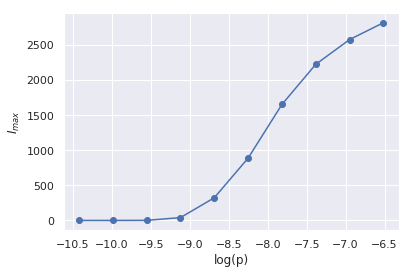

In [11]:
plt.plot(numpy.log10(parr), cmc[:,-1], 'o-')
plt.xlabel('log(p)')
plt.ylabel(r'$I_{max}$')
plt.savefig('/home/iiser/PhD/github-cancer-incidence-models/all-figures/v2-figures/22Oct2018/linear-v2-multipop-imax-p.svg')

Text(0,0.5,'Crude incidence')

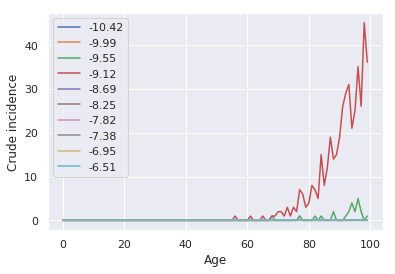

In [2]:
for i,l  in zip(crr, numpy.log10(parr).round(decimals=2)):
    plt.plot(i, label=l)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Crude incidence')
# plt.savefig('/home/iiser/PhD/github-cancer-incidence-models/all-figures/v2-figures/11Oct2018/linear-v2-multipop-age-crude-incidence-p.svg')

Text(0,0.5,'Cumulative incidence')

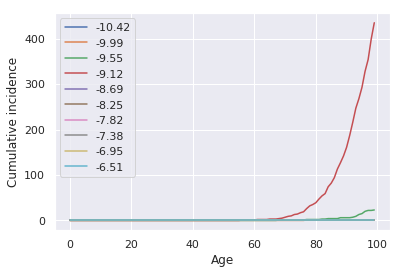

In [3]:
for i,l  in zip(cmc, numpy.log10(parr).round(decimals=2)):
    plt.plot(i, label=l)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Cumulative incidence')
# plt.savefig('/home/iiser/PhD/github-cancer-incidence-models/all-figures/v2-figures/11Oct2018/linear-v2-multipop-age-cumulative-incidence-p.svg')

In [ ]:
# cdata = pd.DataFrame(cmc.T)

# cdata.index.names = ['Replicates']
# cdata.columns.names = ['Age']

# x = numpy.arange(0,age)
# y = cmc.mean(axis=0)
# ystd = cmc.std(axis=0)
# conf = 1.96*ystd/(rep**0.5)

# plt.plot(x, y)
# plt.fill_between(x, y-conf, y+conf, alpha=0.5)
# plt.xlabel('Age (years)')
# plt.ylabel('Cumulative incidence')

In [ ]:
# mdata = pd.DataFrame(marr.T)
# mdata.columns = garr
# mdata.columns.names = ['Growth rate']
# mdata.index.names = ['m']

# ax = sns.boxplot(data=(mdata/n).where(mdata!=0))
# ax = sns.stripplot(data=(mdata/n).where(mdata!=0), color='.2', alpha=0.5, marker='.')
# plt.savefig('/home/iiser/PhD/Research/cancer_project/cancer_incidence_model/linear_model/V1/figures/22Aug2018/linear_v1_mnratio_gsvg')